<a href="https://colab.research.google.com/github/ragu8/PLANT_CLASSIFICATION/blob/main/Plant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm
import sklearn.model_selection as model_selection
from math import floor
from tkinter.filedialog import askopenfilename

In [2]:
# Now we create the class names and store them in the labels.

class_names = ['Arive-Dantu',
                'Basale',
               'Betel',
               'Crape_Jasmine',
               'Curry', 'Drumstick',
               'Fenugreek',
               'Guava',
               'Hibiscus',
               'Indian_Beech',
               'Indian_Mustard',
               'Jackfruit',
               'Jamaica_Cherry-Gasagase',
               'Jamun',
               'Jasmine',
               'Karanda',
               'Lemon',
               'Mango',
               'Mexican_Mint',
               'Mint',
               'Neem',
               'Oleander',
               'Parijata',
               'Peepal',
               'Pomegranate',
               'Rasna',
               'Rose_apple',
               'Roxburgh_fig',
               'Sandalwood',
               'Tulsi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [10]:
def load_data():
    
    #datasets = ['../Plant Identification/train','../Plant Identification/test' ]
    dataset = 'dataset'
    output = []
    
     # Iterate through training and test sets
    #for dataset in datasets:
        
    images = []
    labels = []
        
    print("Loading Dataset {}".format(dataset))
        
        # Iterate through each folder corresponding to a cat
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
            
            # Iterate through each image in our folder
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
            img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
            image = pre_process(img_path) 
                
                # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
                
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
   
    image_train, image_test, label_train, label_test = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101)    
    output.append((image_train, label_train))
    output.append((image_test, label_test))

    return output


In [11]:
(train_images, train_labels), (test_images, test_labels) = load_data()
 

Loading Dataset ./dataset


FileNotFoundError: ignored

In [ ]:

train_images, train_labels = shuffle(train_images, train_labels, random_state=25)



In [ ]:
train_data = train_labels.shape[0]
test_data = test_labels.shape[0]


print ("Number of Training samples: {}".format(train_data))
print ("Number of Testing samples: {}".format(test_data))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of Training samples: 1467
Number of Testing samples: 367
Each image is of size: (150, 150)


In [ ]:
train_images[0]
train_images = train_images / 255.0 
test_images = test_images / 255.0
train_images[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
def display_examples(class_names, images, labels):
    number_of_classes=30
    dlabels = np.ndarray(shape=(number_of_classes), dtype = 'int32')
    imageindex = np.ndarray(shape=(number_of_classes), dtype = 'int32') 
    
    j=0
    for i in range (labels.shape[0]):
        if labels[i] not in dlabels:
             imageindex[j]=i
             dlabels[j]=labels[i]
             j=j+1
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the training dataset", fontsize=16)
    j=1
    cols=5
    rows= floor(number_of_classes/cols)
    for i in imageindex:
        plt.subplot(rows,cols,j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
        j=j+1
    plt.show()
    

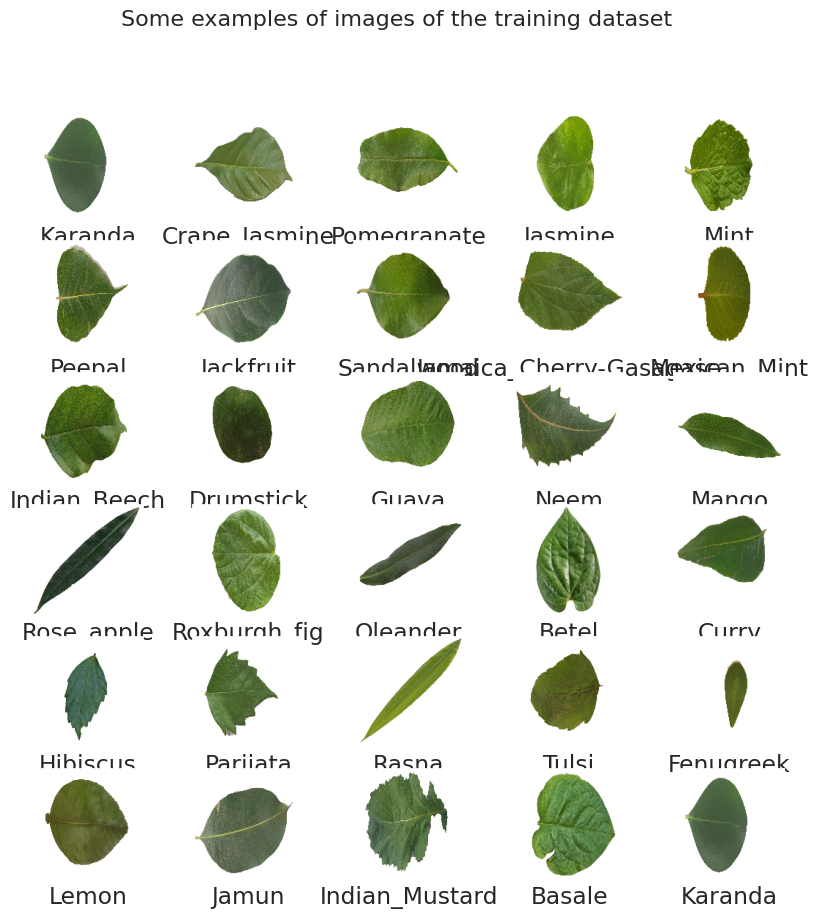

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-09-11 19:25:24.729040: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-11 19:25:24.729100: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROG): /proc/driver/nvidia/version does not exist
2022-09-11 19:25:24.730550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

2022-09-11 19:25:24.874034: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 316710000 exceeds 10% of free system memory.


Epoch 1/5


2022-09-11 19:25:25.771758: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-09-11 19:25:26.553878: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 16s - loss: 3.4035 - accuracy: 0.0547

2022-09-11 19:25:27.009932: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-09-11 19:25:27.764204: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


10/10 [==============================] - 12s 1s/step - loss: 3.6523 - accuracy: 0.0767 - val_loss: 3.2042 - val_accuracy: 0.1293
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 2.8604 - accuracy: 0.2489 - val_loss: 2.5881 - val_accuracy: 0.2891
Epoch 3/5
10/10 [==============================] - 10s 1s/step - loss: 2.0210 - accuracy: 0.4876 - val_loss: 1.8595 - val_accuracy: 0.4014
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 1.3070 - accuracy: 0.6240 - val_loss: 1.5090 - val_accuracy: 0.5952
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 1.0427 - accuracy: 0.7042 - val_loss: 1.3783 - val_accuracy: 0.6156


In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

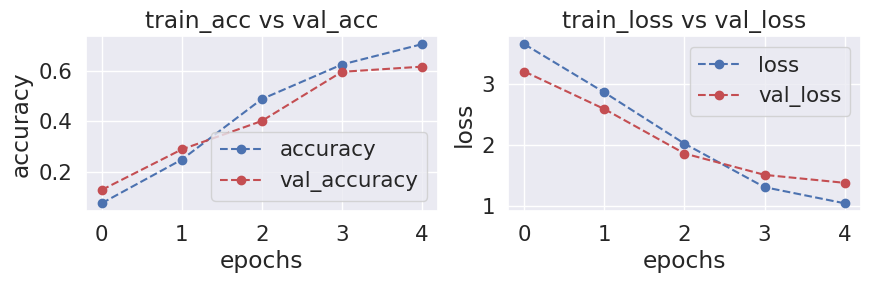

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 47ms/step - loss: 1.2827 - accuracy: 0.6349


In [ ]:
def display_random_image(class_names, dimages, dlabels):
    
    index = np.random.randint(dimages.shape[0])
    plt.figure()
    plt.imshow(dimages[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[dlabels[index]])
    plt.show()

12/12 [==============================] - 1s 44ms/step


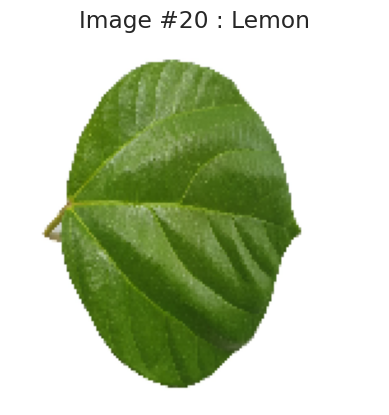

In [ ]:
# may not be needed
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def Test(pimage):
    data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
    IMAGE_SIZE = (150, 150)
    pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
    pimage = cv2.resize(pimage, IMAGE_SIZE) 
    normalized_image_array = np.array(pimage, dtype = 'float32')
    # Load the image into the array
    data[0] = normalized_image_array
    # run the inference
    prediction = model.predict(data)
    pred_label = np.argmax(prediction, axis = 1) # We take the highest probability
    class_prediction = class_names[pred_label[0]]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pimage, cmap=plt.cm.binary)
    plt.xlabel(class_prediction)
    plt.show()
    
    if class_prediction == 'Arive-Dantu':
        print('Arive-Dantu: Also known as Amarnath, this plant can be used as a food to eat when on diet or looking forweight loss as it is rich in fiber, extremely low in calories, have traces of fats and absolutely no cholestrol. It is used to help cure ulcers, diarrhea, swelling of mouth or throat and high cholesterol. It also has chemicals that act antioxidants.')

    if class_prediction == 'Basale':
        print('Basale: Basale has an anti-inflammatory activity and wound healing ability. It can be helpful as a first aid, and the leaves of this plant can be crushed and applied to burns, scalds and wounds to help in healing of the wounds.')

    if class_prediction == 'Betel':
        print('Betel: The leaves of Betel possess immense therapeutic potential, and are often used in helping to cure mood swings and even depression. They are also quite an effective way to improve digestive health as they effectively neutralise pH imbalances in the stomach. The leaves are also full of many anti-microbial agents that combat the bacteria in your mouth.')

    if class_prediction == 'Crape_Jasmine':
        print('Crape Jasmine: Jasmine is used in the curing of liver diseases, such as hepatits, and in abdominal pain caused due to intense diarrhea, or dysentery. The smell of Jasmine flowers can be used to improve mood, reduce stress levels, and also to reduce food cravings. Jasmine can also be used to help in fighting skin diseases and speed up the process of wound healing.')

    if class_prediction == 'Curry':
        print('Curry: Curry leaves have immense nutritional value with low calories, and they help you fight nutritional deficiency of Vitamin A, Vitamin B, Vitamin C, Vitamin B2, calcium and iron. It aids in digestion and helps in the treatment of morning sickness, nausea, and diarrhea. The leaves of this plant have properties that help in lowering blood cholesterol levels. It can also be used to promote hair growth and decrease the side effects of chemotherapy and radiotherapy')

    if class_prediction == 'Drumstick':
        print('Drumstick: Drumstick contains high amounts of Vitamin C and antioxidants, which help you to build up your immune system and fight against common infections such as common cold and flu. Bioactive compounds in this plant help to relieve you from thickening of the arteries and lessens the chance of developing high blood pressure. An due to a high amount of calcium, Drumstick helps in developing strong and healthy bones.')

    if class_prediction == 'Fenugreek':
        print('Fenugreek: Commonly known as Methi in Indian households, Fenugreek is a plant with many medical abilities. It is said that Fenugreek can aid in metabolic condition such as diabetes and in regulating the blood sugar. Fenugreek has also been found to be as effective as antacid medications for heartburn. Due to its high nutritional value and less calories, it is also a food item to help prevent obesity.')

    if class_prediction == 'Guava':
        print('Guava: Aside from bearing a delicious taste, the fruit of the Guava tree is a rich source of Vitamin C and antioxidants. It is especially effective against preventing infections such as Gastrointestinal infections, Respiratory infections, Oral/dental infections and Skin infections. It can also aid in the treatment of Hypertension, Fever, Pain, Liver and Kidney problems. ')

    if class_prediction == 'Hibiscus':
        print('Hibiscus: The tea of the hibiscus flowers are quite prevalent and are used mainly to lower blood pressure and prevent Hypertension. It is also used to relieve dry coughs. Some studies suggest that the tea has an effect in relieving from fever, diabetes, gallbladder attacks and even cancer. The roots of this plant can also be used to prepare a tonic.')

    if class_prediction == 'Indian_Beech':
        print('Indian Beech: Popularly known as Karanja in India, the Indian Beech is a medicinal herb used mainly for skin disorders. Karanja  oil is applied to the skin to manage boils, rashes and eczema as well as heal wounds as it has antimicrobial properties. The oil can also be useful in arthritis due to it’s anti-inflammatory activities.')

    if class_prediction == 'Indian_Mustard':
        print('Mustard: Mustard and its oil is widely used for the relief of joint pain, swelling, fever, coughs and colds. The mustard oil can be used as a massage oil, skin serum and for hair treatment. The oil can also be consumed, and as it is high in monounsaturated fatty acids, Mustard oil turns out to be a healthy choice for your heart. ')

    if class_prediction == 'Jackfruit':
        print('Jackfruit: Jackfruits are full with Carotenoids, the yellow pigments that give jackfruit it’s characteristic colour. is high in Vitamin A, which helps in preventing heart diseases and eye problems such as cataracts and macular degeneration and provides you with an excellent eyesight.')

    if class_prediction == 'Jamaica_Cherry-Gasagase':
        print('Jamaican Cherry: The Jamaican Cherry plant have Anti-Diabetic properties which can potential cure type 2 diabetes. Jamaican Cherry tea contains rich amounts of nitric oxide, which relaxes blood vessels, reducing the chance of hypertension. Other than that, it can help to relieve paint, prevent infections, boost immunity and promote digestive health.')

    if class_prediction == 'Jamun':
        print('Jamun: The fruit extract of the Jamun plant is used in treating the common cold, cough and flu. The bark of this tree contain components like tannins and carbohydrates that can be used to fight dysentery. Jamun juice is used for treating sore throat problems and is also effective in the enlargement of the spleen')

    if class_prediction == 'Jasmine':
        print('Jasmine: Jasmine is used in the curing of liver diseases, such as hepatits, and in abdominal pain caused due to intense diarrhea, or dysentery. The smell of Jasmine flowers can be used to improve mood, reduce stress levels, and also to reduce food cravings. Jasmine can also be used to help in fighting skin diseases and speed up the process of wound healing.')

    if class_prediction == 'Karanda':
        print('Karanda: Karanda is especially used in treating problems regarding digestion. It is used to cure worm infestation, gastritis, dermatitis, splenomegaly and indigestion. It is also useful for respiratory infections such as cough, cold, asthama, and even tuberculosis.')

    if class_prediction == 'Lemon':
        print('Lemon: Lemons are an excellent source of Vitamin C and fiber, and therefore, it lowers the risk factors leading to heart diseases. Lemons are also known to prevent Kidney Stones as they have Citric acid that helps in preventing Kidney Stones. Lemon, with Vitamin C and citric acid helps in the absorption of iron.')

    if class_prediction == 'Mango':
        print('Mango: Known as King of Fruits by many, Mango is also packed with many medicinal properties. Mangoes have various Vitamins, such as Vitamin C, K, A, and minerals such as Potassium and Magnesium. Mangoes are also rich in anitoxidants, which can reduce the chances of Cancer. Mangoes are also known to promote digestive health and heart health too.')

    if class_prediction == 'Mexican_Mint':
        print('Mexican Mint: Mexican Mint is a traditional remedy used to treat a variety of conditions. The leaves are a major part used for medicinal purposes. Mexican mint helpsin curing respiratory illness, such as cold, sore throat, congestions, runny nose, and also help in natural skincare.')

    if class_prediction == 'Mint':
        print('Mint: Mint is used usually in our daily lives to keep bad mouth odour at bay, but besides that, this plant also help in a variety of other functions such as relieving Indigestion, and upset stomach, and can also improve Irritable Bowel Syndrome (IBS). Mint is also full of nutrients such as Vitamin A, Iron, Manganese, Folate and Fiber.')

    if class_prediction == 'Neem':
        print('Neem: Prevalent in traditional remedies from a long time, Neem is considered as a boon for Mankind. It helps to cure many skin diseases such as Acne, fungal infections, dandruff, leprosy, and also nourishes and detoxifies the skin. It also boosts your immunity and act as an Insect and Mosquito Repellent. It helps to reduce joint paint as well and prevents Gastrointestinal Diseases')

    if class_prediction == 'Oleander':
        print('Oleander: The use of this plant should be done extremely carefully, and never without the supervision of a doctor, as it can be a deadly poison. Despite the danger, oleander seeds and leaves are used to make medicine. Oleander is used for heart conditions, asthma, epilepsy, cancer, leprosy, malaria, ringworm, indigestion, and venereal disease.')

    if class_prediction == 'Parijata':
        print('Parijata: Parijata plant is used for varying purposes. It shows anti-inflammatory and antipyretic (fever-reducing) properties which help in managing pain and fever. It is also used as a laxative, in rheumatism, skin ailments, and as a sedative. It is also said to provide relief from the symptoms of cough and cold. Drinking fresh Parijat leaves juice with honey helps to reduce the symptoms of fever.')

    if class_prediction == 'Peepal':
        print('Peepal: The bark of the Peeple tree, rich in vitamin K, is an effective complexion corrector and preserver. It also helps in various ailments such as Strengthening blood capillaries, minimising inflammation, Healing skin bruises faster, increasing skin resilience, treating pigmentation issues, wrinkles, dark circles, lightening surgery marks, scars, and stretch marks.')

    if class_prediction == 'Pomegranate':
        print('Pomegranate: Pomegranate has a variety of medical benefits. It is rich in antioxidants, which reduce inflation, protect cells from damage and eventually lower the chances of Cancer. It is also a great source of Vitamin C and an immunity booster. Pomegranate has also shown to stall the progress of Alzheimer disease and protect memory.')

    if class_prediction == 'Rasna':
        print('Rasna: The Rasna plant or its oil helps to reduce bone and joint pain and reduce the symptoms of rheumatioid arthritis. It can also be used to cure cough and cold, release mucus in the respiratory system and clear them, eventually facilitates easy breathing. Rasna can also be applied to wounds to aid them in healing.')

    if class_prediction == 'Rose_apple':
        print('Rose apple: Rose apple’s seed and leaves are used for treating asthma and fever. Rose apples improve brain health and increase cognitive abilities. They are also effective against epilepsy, smallpox, and inflammation in joints. They contain active and volatile compounds that have been connected with having anti-microbial and anti-fungal effects. ')

    if class_prediction == 'Roxburgh_fig':
        print('Roxburgh fig: Roxburgh fig is noted for its big and round leaves. Leaves are crushed and the paste is applied on the wounds. They are also used in diarrhea and dysentery.')

    if class_prediction == 'Sandalwood':
        print('Sandalwood: Sandalwood is used for treating the common cold, cough, bronchitis, fever, and sore mouth and throat. It is also used to treat urinary tract infections (UTIs), liver disease, gallbladder problems, heatstroke, gonorrhea, headache, and conditions of the heart and blood vessels (cardiovascular disease).')

    if class_prediction == 'Tulsi':
        print('Tulsi: Tulsi plant has the potential to cure a lot of ailments, and is used a lot in traditional remedies. Tulsi can help cure fever, to treat skin problems like acne, blackheads and premature ageing, to treat insect bites. Tulsi is also used to treat heart disease and fever, and respiratory problems.')


1/1 [==============================] - 0s 35ms/step


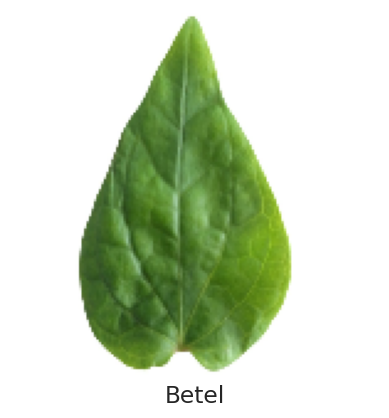

Betel: The leaves of Betel possess immense therapeutic potential, and are often used in helping to cure mood swings and even depression. They are also quite an effective way to improve digestive health as they effectively neutralise pH imbalances in the stomach. The leaves are also full of many anti-microbial agents that combat the bacteria in your mouth.


In [ ]:
pimage = cv2.imread(askopenfilename())
Test(pimage)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(train_images, test_images)


ValueError: Found array with dim 4. RandomForestClassifier expected <= 2.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
class_names=[   'Arive-Dantu',
                'Basale',
               'Betel',
               'Crape_Jasmine',
               'Curry', 'Drumstick',
               'Fenugreek',
               'Guava',
               'Hibiscus',
               'Indian_Beech',
               'Indian_Mustard',
               'Jackfruit',
               'Jamaica_Cherry-Gasagase',
               'Jamun',
               'Jasmine',
               'Karanda',
               'Lemon',
               'Mango',
               'Mexican_Mint',
               'Mint',
               'Neem',
               'Oleander',
               'Parijata',
               'Peepal',
               'Pomegranate',
               'Rasna',
               'Rose_apple',
               'Roxburgh_fig',
               'Sandalwood',
               'Tulsi']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model,train_images, test_images,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'